In [1]:
### Imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import GridSpec
import seaborn as sb
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR, SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

## The Aim in this notebook, like the previous one is to study the performances of SVR ( Support Vector Regression )  algorithm for the specific task of predicting the prices of Airbnb listings in Berlin. 

## I / Preprocessing 

Here we will go from the same csv as the one gotten at the end of the preprocessing from the Random Forest notebook. 

In [3]:
df_data_2 = pd.read_csv('train_airbnb_berlin_preprocessed_phase2.csv', sep=';')
## df_data_2 = pd.read_csv('../../data/train_airbnb_berlin_preprocessed_phase2.csv', sep=';')
df_data_2.head()

,Host Since,Host Response Rate,Is Superhost,Latitude,Longitude,Is Exact Location,Accomodates,Bathrooms,Bedrooms,Beds,...,Neighborhood Group_NeukÃ¶lln,Neighborhood Group_Pankow,Neighborhood Group_Reinickendorf,Neighborhood Group_Spandau,Neighborhood Group_Steglitz - Zehlendorf,Neighborhood Group_Tempelhof - SchÃ¶neberg,Neighborhood Group_Treptow - KÃ¶penick,Boy or Girl?_Boy,Boy or Girl?_Girl,Distance from barycenter
0,1206,NaN,0.0,52.54652,13.41792,0.0,2.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,1,0,0.038097
1,2224,NaN,0.0,52.56512,13.42214,0.0,2.0,1.0,2.0,2.0,...,0,1,0,0,0,0,0,0,1,0.057150
2,1188,NaN,0.0,52.54741,13.42521,0.0,3.0,1.0,1.0,2.0,...,0,1,0,0,0,0,0,1,0,0.041516
3,318,NaN,0.0,52.50958,13.45144,0.0,2.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0.044018
4,2185,92.0,1.0,52.52995,13.41558,1.0,3.0,1.0,1.0,2.0,...,0,1,0,0,0,0,0,0,1,0.021648


## II / Split to obtain the Train - Test sets

We use the same split as the Random Forest notebook, so no need to print the graph of all the distributions 

In [4]:
y = df_data_2['Price']
X = df_data_2.drop(['Price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## III/ First rough application of the algorithm with mean imputation 

In [5]:
from sklearn.impute import SimpleImputer
pipe = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                    ('svr', SVR(C=10, epsilon=0))])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

## Metrics 
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

### Printing the metrics 
print(f'Mean Squared Error : {mse}')
print(f'Mean Absolute Error : {mae}')
print(f'Root Mean Absolute Error : {rmse}')
print(f'R2 Score: {r2}')

Mean Squared Error : 2104.622794905578
Mean Absolute Error : 27.647137101511998
Root Mean Absolute Error : 45.87616804949578
R2 Score: -0.0628513740905734


The results are not great ! : \
- Mean Squared Error : 2104.622794905578
- Mean Absolute Error : 27.647137101511998
- Root Mean Absolute Error : 45.87616804949578
- R2 Score: -0.0628513740905734

Moreover the R2 score is negatif which proves that the model is less effectif then if we predicted the mean price everytime.

Let's see if we can get a better score ! 

## IV/ Now let's try to make this algorithme better ! 

### A/ Imputation 

We will test 2 types of imputations :
Mean
Median

In [6]:
## Mean 
pipe = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                    ('svr', SVR(C=10, epsilon=0))])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_test)

## Metrics 
mse = mean_squared_error(y_train_pred, y_test)
mae = mean_absolute_error(y_train_pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_train_pred)

### Printing the metrics 
print(f'Mean Squared Error : {mse}')
print(f'Mean Absolute Error : {mae}')
print(f'Root Mean Absolute Error : {rmse}')
print(f'R2 Score: {r2}')

Mean Squared Error : 2104.622794905578
Mean Absolute Error : 27.647137101511998
Root Mean Absolute Error : 45.87616804949578
R2 Score: -0.0628513740905734


In [7]:
## Median 
pipe = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                    ('svr', SVR(C=10,epsilon=0))])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_test)

## Metrics 
mse = mean_squared_error(y_train_pred, y_test)
mae = mean_absolute_error(y_train_pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_train_pred)

### Printing the metrics 
print(f'Mean Squared Error : {mse}')
print(f'Mean Absolute Error : {mae}')
print(f'Root Mean Absolute Error : {rmse}')
print(f'R2 Score: {r2}')

Mean Squared Error : 2104.181828130314
Mean Absolute Error : 27.64695435303018
Root Mean Absolute Error : 45.871361742707336
R2 Score: -0.06262868233595031


The difference is not huge but with median imputation we get a better result. So lets go with that ! 

### B/ Standardization 

For SVR we will get better results if we scale the values between -1 and 1. Therefore let's do a standardization on the values 

In [9]:
pipeline = Pipeline([ ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                      ('scaler', StandardScaler()),
                      ('svr', SVR(C=10, epsilon=0))])


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


## Metrics 
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

### Printing the metrics 
print(f'Mean Squared Error : {mse}')
print(f'Mean Absolute Error : {mae}')
print(f'Root Mean Absolute Error : {rmse}')
print(f'R2 Score: {r2}')

Mean Squared Error : 1156.1630749951876
Mean Absolute Error : 19.49124445906141
Root Mean Absolute Error : 34.00239807712373
R2 Score: 0.41612838371516914


Just with this Standardization the score drops significantly ! And the R2 is no longer negatif ! 

- Mean Squared Error : 1156.1630749951876
- Mean Absolute Error : 19.49124445906141
- Root Mean Absolute Error : 34.00239807712373
- R2 Score: 0.41612838371516914

### C/ Curse of dimensionality --> Feature reduction 

In this part we will explore the feature reduction for SVR We will test and see what we could get ! 

#### i / PCA 

Let see if we do a PCA and fit the model with it, what the result might be 

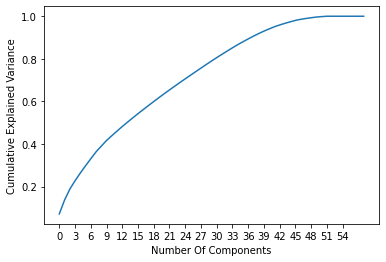

In [18]:
from sklearn.decomposition import PCA

pipe = Pipeline([ ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                      ('scaler', StandardScaler()),
                      ('pca', PCA())])

pipe.fit(X_train)

## plot number of components in fonction of cumulative explained variance betweent 0 and 10 
plt.plot(np.cumsum(pipe['pca'].explained_variance_ratio_))
plt.xlabel('Number Of Components')
plt.xticks(np.arange(0, 55, 3))
plt.ylabel('Cumulative Explained Variance')
plt.show()


Most of the variance is explained by 48 components. We don't really have a reduction in termes of features. We will still launch a test with these components to see what we get

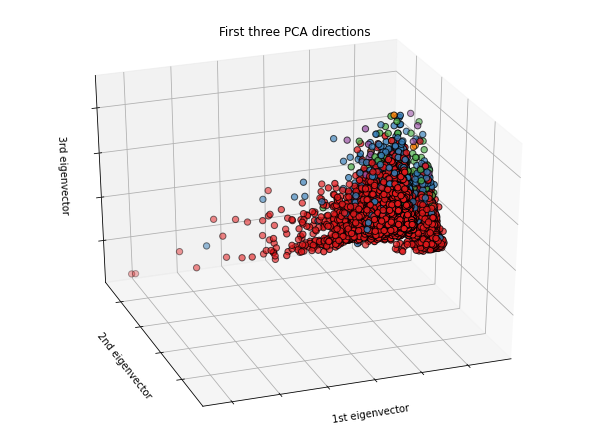

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

pipe = Pipeline([ ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                      ('scaler', StandardScaler()),
                      ('pca', pca)])

pipe.fit(X_train)

X_train_pca = pipe.transform(X_train)
X_test_pca = pipe.transform(X_test)
# visualize the data in 3D

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

Here we see that with only 3 components we can't explain the entire dataset. But lets see the rmse with the 48 components like previously as ouR entry for the SVR model. 

In [20]:

pipe = Pipeline([ ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                      ('scaler', StandardScaler()),
                      ('pca',PCA(n_components=48)),
                      ('svr', SVR())])



pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

## Metrics 
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

### Printing the metrics 
print(f'Mean Squared Error : {mse}')
print(f'Mean Absolute Error : {mae}')
print(f'Root Mean Absolute Error : {rmse}')
print(f'R2 Score: {r2}')


Mean Squared Error : 1343.145347844311
Mean Absolute Error : 20.511161136791596
Root Mean Absolute Error : 36.64894743160178
R2 Score: 0.32170083778659564


The mse and rmse are higher, so we will drop this feature reduction method ! 

#### ii/ Forward feature selection 

In [ ]:
import time 

def forward(features):

    tic = time.time()
    # Pull out features we still need to process
    remaining_features = [d for d in X_train.columns if d not in features]
    
    results = []
    
    for d in remaining_features:
        model = SVR(C=10,epsilon=0)
        model = model.fit(X_train[features+[d]], y_train)
        RSS = ((model.predict(X_test[features+[d]]) - y_test) ** 2).sum()
        results.append({"model":model, "features":features+[d], "RSS":RSS})
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    toc = time.time() 

    print("Processed", models.shape[0], "models on", len(features)+1, "features in", (toc-tic), "seconds.")
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_fwd = pd.DataFrame(columns=["RSS", "features", "model"])

tic = time.time()
features = []

for i in range(1,len(X_train.columns)+1):  
    model = forward(features)
    models_fwd.loc[i] = model
    features = model["features"]

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

### This took to long to run, we will keep on going

### D/Grid Search 

In [ ]:
model_svr = SVR()
params_grid = {'kernel':['linear','rbf'],
               'C':[0.0001,0.001,0.01,0.1,1,5,10],
               'epsilon':[0.001,0.01,0.1,0,1,2,5] } 

model_search_svr = RandomizedSearchCV(model_svr, params_grid, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1, return_train_score=True)

model_search_svr.fit(X_train, y_train)

In [ ]:
print(f'Best parameters are {model_search_svr.best_params_}') 
print(f'Best score is {model_search_svr.best_score_ * -1}')
print(f'Best model is {model_search_svr.best_estimator_}')
print("scores {}".format(model_search_svr.cv_results_['mean_test_score']))

This took too long, and I found a better approach that might have better results, and trains faster then regular SVR. So we will do Grid search and features selection on that approch 

## V/ One more Approach : LinearSVR 

### A/ First test 

In [21]:
pipe = Pipeline([ ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                      ('scaler', StandardScaler()),
                      ('lin_svr',LinearSVR())])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

## Metrics 
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
### Printing the metrics 
print(f'Mean Squared Error : {mse}')
print(f'Mean Absolute Error : {mae}')
print(f'Root Mean Absolute Error : {rmse}')
print(f'R2 Score: {r2}')


Mean Squared Error : 1114.5371103061373
Mean Absolute Error : 19.35443986312083
Root Mean Absolute Error : 33.38468376825123
R2 Score: 0.4371498293987829


It is lower then regular SVR, so we will continue with this version 

### B/ Grid Search for linearSVR 

Lets do a grid search. We will try different values for each parameters except dual. As when we set dual to True there is an error message. So we will just let it at False 

In [30]:
## Changing X_train 
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(X_train)
X_train_imp = imp_median.transform(X_train)

scaler = StandardScaler()
scaler.fit(X_train_imp)
X_train_scaled = scaler.transform(X_train_imp)


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'], 
              'dual': [False],
              'tol': [0.0001, 0.00001]} 

grid_lin_svr = GridSearchCV(LinearSVR(), param_grid, refit = True, verbose = 10, n_jobs=-1, cv=5,scoring="neg_mean_squared_error") 

grid_lin_svr.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_classes.py", line 499, in fit
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 1185, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/usr/loc

GridSearchCV(cv=5, estimator=LinearSVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'dual': [False],
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'tol': [0.0001, 1e-05]},
             scoring='neg_mean_squared_error', verbose=10)

In [31]:
print(f'Best parameters are {grid_lin_svr.best_params_}') 
print(f'Best score is {grid_lin_svr.best_score_ * -1}')
print(f'Best model is {grid_lin_svr.best_estimator_}')
print("scores {}".format(grid_lin_svr.cv_results_['mean_test_score']))

Best parameters are {'C': 0.1, 'dual': False, 'loss': 'squared_epsilon_insensitive', 'tol': 0.0001}
Best score is 1455.1352445069274
Best model is LinearSVR(C=0.1, dual=False, loss='squared_epsilon_insensitive')
scores [           nan            nan -1455.13524451 -1455.13790222
            nan            nan -1455.149402   -1455.15212134
            nan            nan -1455.15092659 -1455.15365218
            nan            nan -1455.15108014 -1455.15380636
            nan            nan -1455.1510955  -1455.15382179]


Lets look at the score for this Linear SVR with the tuned hyperparameters. 

In [32]:
pipe = Pipeline([ ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                      ('scaler', StandardScaler()),
                      ('lin_svr', LinearSVR(C= 0.1, dual= False, loss='squared_epsilon_insensitive', tol=0.0001))])

pipe.fit(X_train, y_train)

preds_svr_best = pipe.predict(X_test)


mse_svr_best = mean_squared_error(preds_svr_best, y_test)
mae_svr_best = mean_absolute_error(preds_svr_best, y_test)
rmse_svr_best = np.sqrt(mse_svr_best)
r2_svr_best = r2_score(y_test, preds_svr_best)

print("Mean Squared Error: {}".format(mse_svr_best))
print("Mean Absolute Error: {}".format(mae_svr_best))
print("Root Mean Absolute Error: {}".format(rmse_svr_best))
print("R2 Score: {}".format(r2_svr_best))

Mean Squared Error: 1033.6208787903295
Mean Absolute Error: 20.314704470247296
Root Mean Absolute Error: 32.14997478677595
R2 Score: 0.478013174631469


The scores are pretty good : 
- Mean Squared Error: 1033.6208787903295
- Mean Absolute Error: 20.314704470247296
- Root Mean Absolute Error: 32.14997478677595
- R2 Score: 0.478013174631469


### C/Forward feature selections 

In [33]:
## Changing X_train 
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(X_train)
X_train_imp = imp_median.transform(X_train)

scaler = StandardScaler()
scaler.fit(X_train_imp)
X_train_imp = scaler.transform(X_train_imp)

X_train_imp = pd.DataFrame(X_train_imp, columns=X_train.columns)

## X_test 
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(X_test)
X_test_imp = imp_median.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_test_imp)
X_test_imp = scaler.transform(X_test_imp)
X_test_imp = pd.DataFrame(X_test_imp, columns=X_test.columns)


In [34]:
import time 

def forward(features):

    tic = time.time()
    # Pull out features we still need to process
    remaining_features = [d for d in X_train_imp.columns if d not in features]
    
    results = []
    
    for d in remaining_features:
        model = LinearSVR(C= 0.1, dual= False, loss='squared_epsilon_insensitive', tol=0.0001)
        model = model.fit(X_train_imp[features+[d]], y_train)
        RSS = ((model.predict(X_test_imp[features+[d]]) - y_test) ** 2).sum()
        results.append({"model":model, "features":features+[d], "RSS":RSS})
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    toc = time.time() 

    print("Processed", models.shape[0], "models on", len(features)+1, "features in", (toc-tic), "seconds.")
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [35]:
models_fwd = pd.DataFrame(columns=["RSS", "features", "model"])

tic = time.time()
features = []

for i in range(1,len(X_train_imp.columns)+1):  
    model = forward(features)
    models_fwd.loc[i] = model
    features = model["features"]
    print(features)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 59 models on 1 features in 0.3855268955230713 seconds.
['Accomodates']
Processed 58 models on 2 features in 0.46698880195617676 seconds.
['Accomodates', 'Room Type_Entire home/apt']
Processed 57 models on 3 features in 0.570061445236206 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms']
Processed 56 models on 4 features in 0.7759172916412354 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Guests Included']
Processed 55 models on 5 features in 0.8365435600280762 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Guests Included', 'Bedrooms']
Processed 54 models on 6 features in 0.8327515125274658 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Guests Included', 'Bedrooms', 'Property Type_Hotel']
Processed 53 models on 7 features in 0.8917031288146973 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Guests Included', 'Bedrooms', 'Property Type_Hotel', 'Property Type_Serviced apartment']


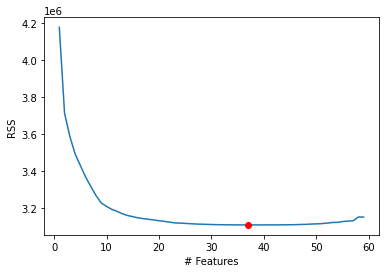

In [36]:
import matplotlib.pyplot as plt

plt.plot(models_fwd["RSS"])
plt.xlabel('# Features')
plt.ylabel('RSS')
plt.plot(models_fwd["RSS"].idxmin(), models_fwd["RSS"].min(), "or")

In [40]:
# Obtaining features of the best model according to the FSS
idx_min = models_fwd["RSS"].idxmin()
best_model_fwd = models_fwd["model"][idx_min]

best_rss_fwd = models_fwd["RSS"].min()
idx_min = models_fwd["RSS"].idxmin()
best_features = models_fwd["features"][idx_min]
print(len(best_features))
print(best_features)

37
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Guests Included', 'Bedrooms', 'Property Type_Hotel', 'Property Type_Serviced apartment', 'Distance from barycenter', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Neighborhood Group_Charlottenburg-Wilm.', 'Property Type_Apartment', 'Property Type_House', 'Location Rating', 'Is Superhost', 'Min Nights', 'Cleanliness Rating', 'Property Type_Guest suite', 'Value Rating', 'Reviews', 'Neighborhood Group_Mitte', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Spandau', 'Longitude', 'Neighborhood Group_Marzahn - Hellersdorf', 'Neighborhood Group_Lichtenberg', 'Accuracy Rating', 'Property Type_Condominium', 'Property Type_Bed and breakfast', 'Neighborhood Group_Reinickendorf', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Property Type_Other', 'Beds', 'Host Response Time_within a few hours', 'Property Type_Boutique hotel', 'Host Response Time_within a day']


The best model is given with 37 features. However we can see from the graph that we should get good results with only around 20 features. But lets try with 37. 

### D/ Test with everything we learnt in the V part 

In [41]:
pipe = Pipeline([ ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                      ('scaler', StandardScaler()),
                      ('lin_svr', LinearSVR(C= 0.1, dual= False, loss='squared_epsilon_insensitive', tol=0.0001))])

pipe.fit(X_train[best_features], y_train)

y_pred = pipe.predict(X_test[best_features])


mse_svr = mean_squared_error(y_pred, y_test)
mae_svr = mean_absolute_error(y_pred, y_test)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred)

print("Mean Squared Error: {}".format(mse_svr))
print("Mean Absolute Error: {}".format(mae_svr))
print("Root Mean Absolute Error: {}".format(rmse_svr))
print("R2 Score: {}".format(r2_svr))

Mean Squared Error: 1018.9820770776996
Mean Absolute Error: 20.170010717607802
Root Mean Absolute Error: 31.92149866591009
R2 Score: 0.48540588678538543


In [43]:
n = len(X_train[best_features])
p = len(X_train[best_features].columns)
adj_r2_svr = 1 - (1-r2_svr)*(n-1)/(n-p-1)
print(f'Adjusted R2 Score: {adj_r2_svr }')

Adjusted R2 Score: 0.48384215631651706


We get the results 
- Mean Squared Error: 1018.9820770776996
- Mean Absolute Error: 20.170010717607802
- Root Mean Absolute Error: 31.92149866591009
- R2 Score: 0.48540588678538543
- Adjusted R2 Score: 0.48384215631651706

The results are pretty good ! ( Not as good as Random Forest, but at the start of this notebook we were far from having a mse of 1018 

## VI / Analyzing the results 

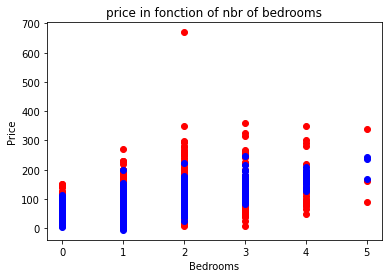

In [45]:
plt.scatter(X_test['Bedrooms'],y_test, color='red') #plotting real points
plt.scatter(X_test['Bedrooms'], y_pred ,color='blue') #plotting f

plt.title("price in fonction of nbr of bedrooms")
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

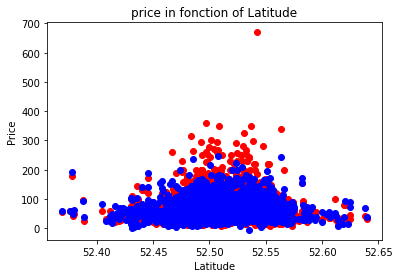

In [46]:
plt.scatter(X_test['Latitude'],y_test, color='red') #plotting real points
plt.scatter(X_test['Latitude'], y_pred,color='blue') #plotting f

plt.title("price in fonction of Latitude")
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.show()

We can see the model covers the general tendancy but don't really get the high prices 

In [47]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


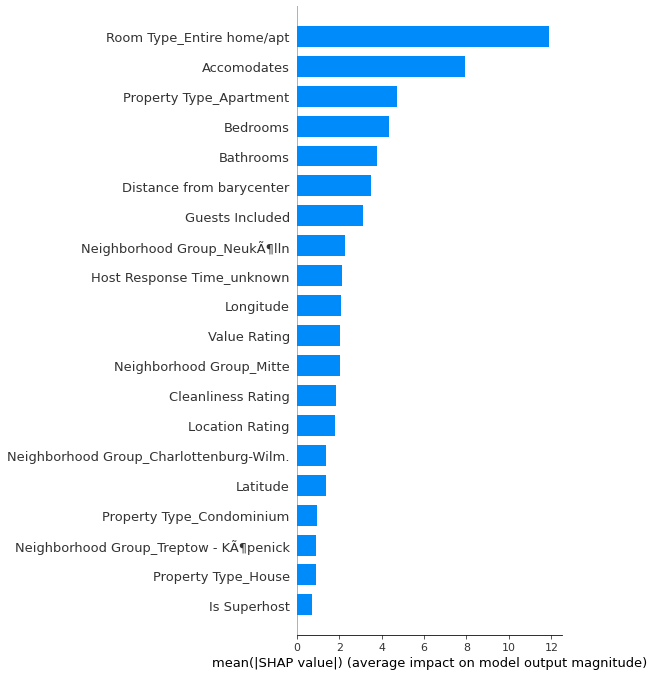

In [57]:
import shap



explainer = shap.LinearExplainer(pipe['lin_svr'], X_train_imp[best_features])
shap_values = explainer.shap_values(X_test_imp[best_features])

shap.summary_plot(shap_values, X_train_imp[best_features], plot_type="bar")

In [58]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train_imp[best_features].iloc[0,:])

With the shapley values we can see what are the important features for the model. They are more less the same then for Random Forest ( some are more important here than for RF). 

Also we can see that the type of accomodation lead the price to be higher while location tends to get it down